Customers Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None 

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 

Products Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Produc

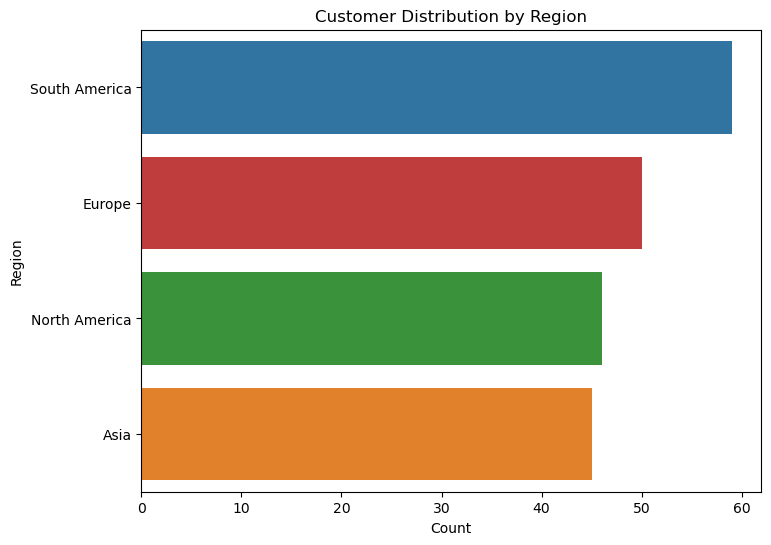

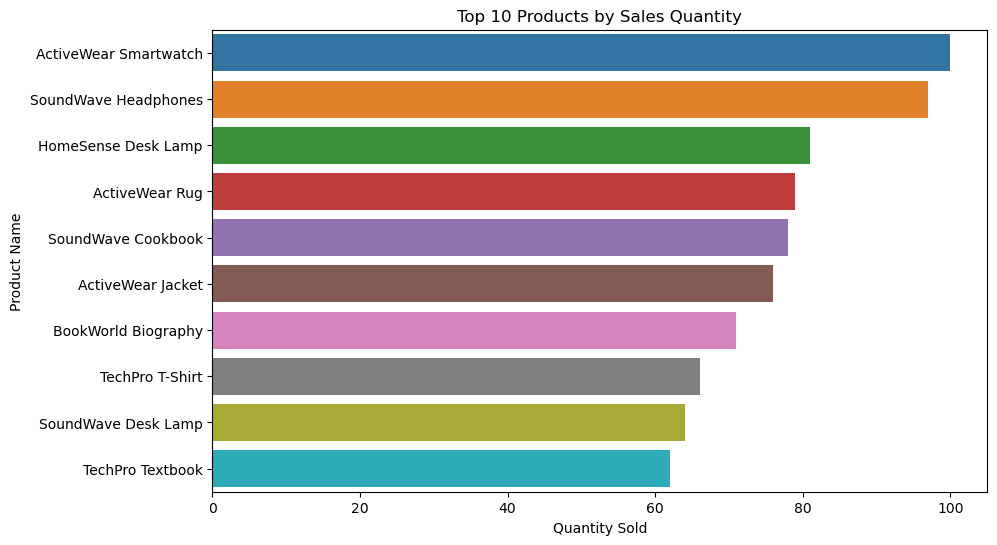

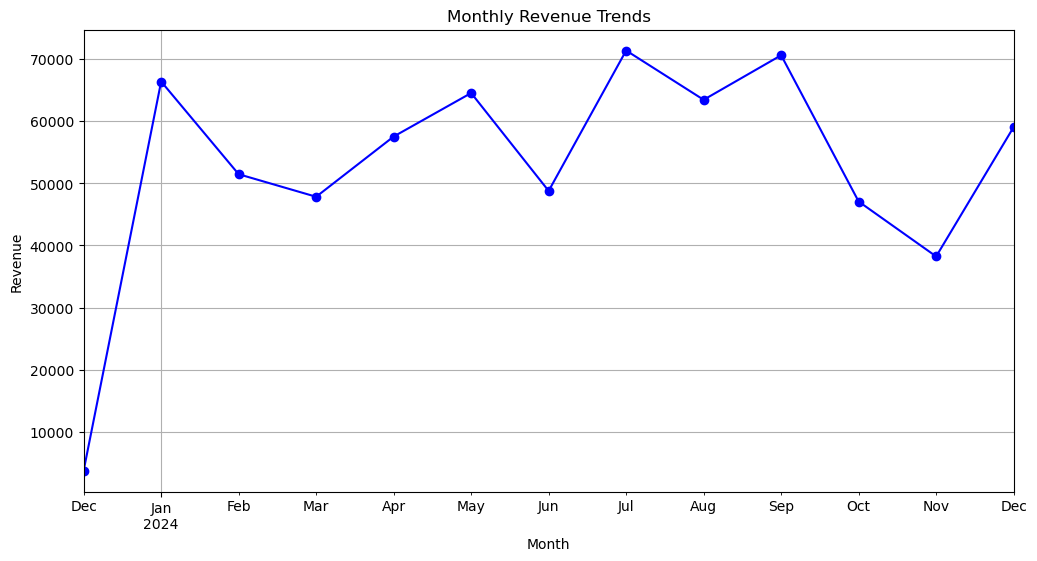

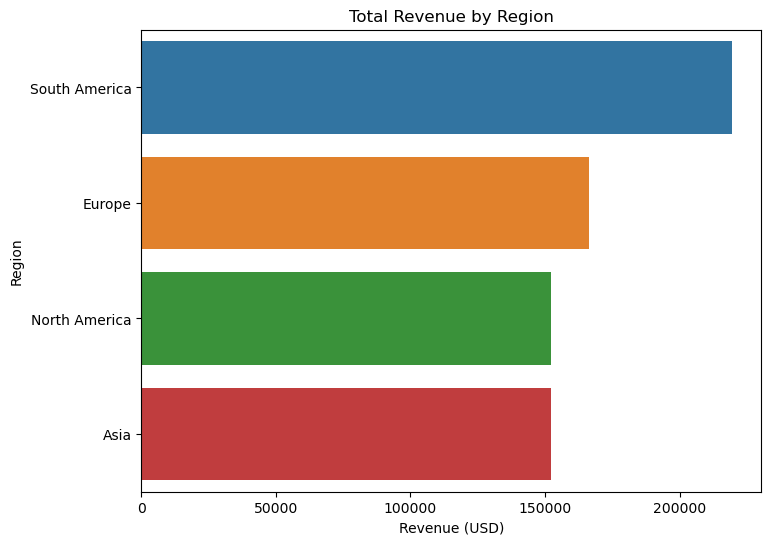

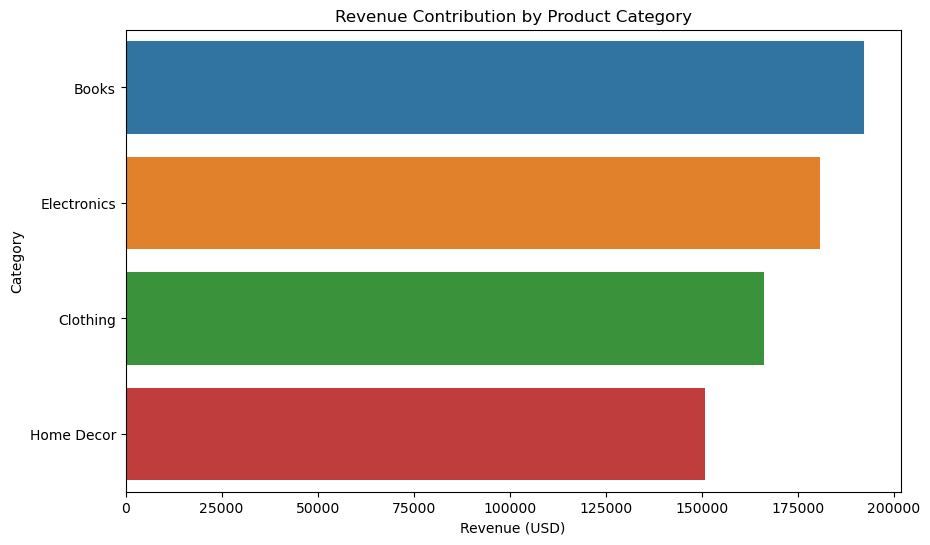

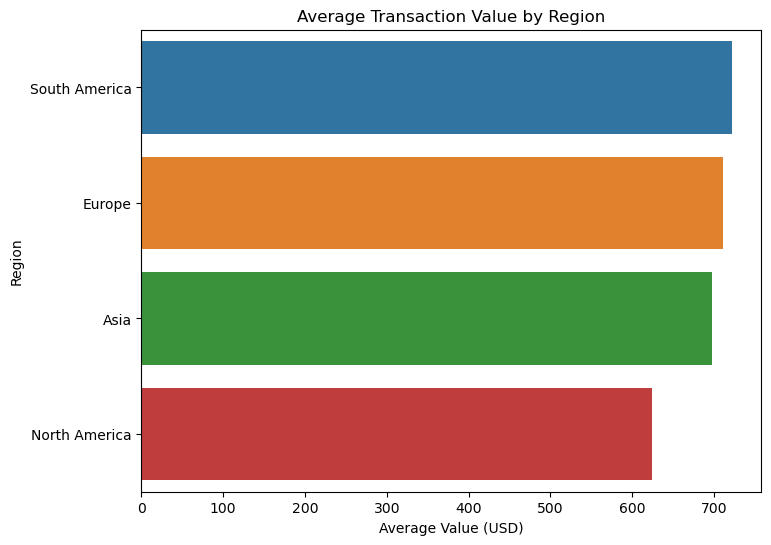

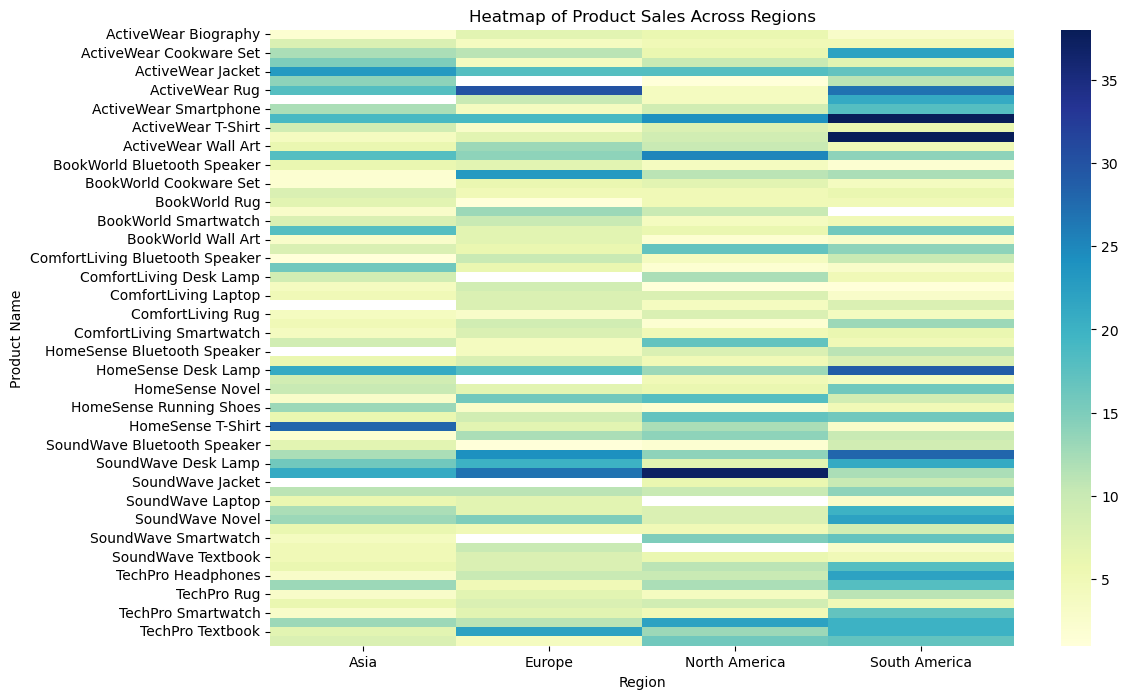

In [9]:
# Exploratory Data Analysis (EDA) for eCommerce Dataset

# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers = pd.read_csv("D:/Practicals/Customers.csv")
products = pd.read_csv("D:/Practicals/Products.csv")
transactions = pd.read_csv("D:/Practicals/Transactions.csv")

# Display basic information about each dataset
print("Customers Dataset:")
print(customers.info(), "\n")
print(customers.head(), "\n")

print("Products Dataset:")
print(products.info(), "\n")
print(products.head(), "\n")

print("Transactions Dataset:")
print(transactions.info(), "\n")
print(transactions.head(), "\n")

# Check for missing values
print("Missing values in Customers:")
print(customers.isnull().sum(), "\n")

print("Missing values in Products:")
print(products.isnull().sum(), "\n")

print("Missing values in Transactions:")
print(transactions.isnull().sum(), "\n")

# Merge datasets for analysis
merged_data = transactions.merge(customers, on="CustomerID", how="left").merge(products, on="ProductID", how="left")

# Basic Visualization
# 1. Customer Distribution by Region
plt.figure(figsize=(8, 6))
sns.countplot(y=customers["Region"], order=customers["Region"].value_counts().index, hue=customers["Region"], dodge=False, legend=False)
plt.title("Customer Distribution by Region")
plt.xlabel("Count")
plt.ylabel("Region")
plt.show()

# 2. Top 10 Products by Sales Quantity
top_products = merged_data.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, hue=top_products.index, dodge=False, legend=False)
plt.title("Top 10 Products by Sales Quantity")
plt.xlabel("Quantity Sold")
plt.ylabel("Product Name")
plt.show()

# 3. Revenue Trends Over Time
merged_data["TransactionDate"] = pd.to_datetime(merged_data["TransactionDate"])
revenue_trends = merged_data.groupby(merged_data["TransactionDate"].dt.to_period("M"))["TotalValue"].sum()

plt.figure(figsize=(12, 6))
revenue_trends.plot(kind="line", marker="o", color="blue")
plt.title("Monthly Revenue Trends")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.grid(True)
plt.show()

# 4. Total Revenue by Region
region_revenue = merged_data.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=region_revenue.values, y=region_revenue.index, hue=region_revenue.index, dodge=False, legend=False)
plt.title("Total Revenue by Region")
plt.xlabel("Revenue (USD)")
plt.ylabel("Region")
plt.show()

# 5. Product Categories Contribution to Revenue
category_revenue = merged_data.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=category_revenue.values, y=category_revenue.index, hue=category_revenue.index, dodge=False, legend=False)
plt.title("Revenue Contribution by Product Category")
plt.xlabel("Revenue (USD)")
plt.ylabel("Category")
plt.show()

# 6. Average Transaction Value by Region
avg_transaction_value = merged_data.groupby("Region")["TotalValue"].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_transaction_value.values, y=avg_transaction_value.index, hue=avg_transaction_value.index, dodge=False, legend=False)
plt.title("Average Transaction Value by Region")
plt.xlabel("Average Value (USD)")
plt.ylabel("Region")
plt.show()

# 7. Heatmap of Product Sales Across Regions
product_region_sales = merged_data.pivot_table(index="ProductName", columns="Region", values="Quantity", aggfunc="sum")
plt.figure(figsize=(12, 8))
sns.heatmap(product_region_sales, cmap="YlGnBu", annot=False)
plt.title("Heatmap of Product Sales Across Regions")
plt.xlabel("Region")
plt.ylabel("Product Name")
plt.show()

